<a href="https://colab.research.google.com/github/Cassi686/Cassi686/blob/main/Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist,pdist
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

In [2]:
df = pd.read_csv('/content/household_power_consumption[1].txt',delimiter=';')
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
df.shape

(2075259, 9)

In [5]:
df.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [6]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [7]:
df.isnull().values.any()

True

In [8]:
df = df.iloc[0:,2:9].dropna() # Dropando dados nulos

In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
df_atrib = df.values

In [12]:
df_atrib

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       [0.938, 0.0, 239.82, ..., 0.0, 0.0, 0.0],
       [0.934, 0.0, 239.7, ..., 0.0, 0.0, 0.0],
       [0.932, 0.0, 239.55, ..., 0.0, 0.0, 0.0]], dtype=object)

In [13]:
# amostra de 1% para não compremeter a memória do cmputador
amostra1,amostra2 = train_test_split(df_atrib, train_size= .01)

In [14]:
amostra1.shape

(20492, 7)

In [15]:
# Aplicar PCA redução de dimensões - Transforma 7 variáveis em 2 variáveis principais

pca = PCA(n_components= 2).fit_transform(amostra1)

In [16]:
# Determinando um range de K
k_range = range(1,12)

In [17]:
# Aplicando o modelo K-Means para cada valor de K
k_means_var = [KMeans(n_clusters= k).fit(pca) for k in k_range]

In [18]:
# Ajustando o centróide do cluster para cada modelo
centroids = [X.cluster_centers_ for X in k_means_var]

In [19]:
# Calculando a distancia euclidiana de cada ponto de dado para o centróide

k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke, axis = 1) for ke in k_euclid]

In [20]:
# Soma dos quadrados das distancia dentro dos clusters

soma_quadrados_intra_clusters = [sum(d**2) for d in dist]

In [21]:
# Soma total dos quadrados

soma_total = sum(pdist(pca)**2)/pca.shape[0]

In [22]:
# soma dos quadradros entre clusters
soma_quadrados_inter_clusters = soma_total - soma_quadrados_intra_clusters

Text(0.5, 1.0, 'Variância Explicada x Valor de K')

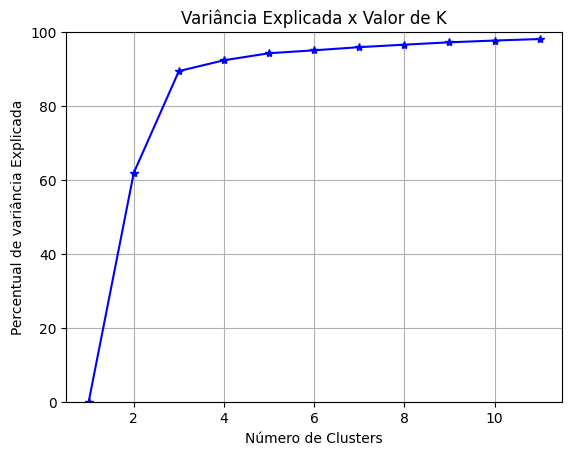

In [23]:
# Curva de Elbow

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, soma_quadrados_inter_clusters/soma_total * 100,'b*-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('Número de Clusters')
plt.ylabel('Percentual de variância Explicada')
plt.title('Variância Explicada x Valor de K')

In [24]:
# Criando modelo com 8 clusters
modelo_v1 = KMeans(n_clusters=8)
modelo_v1.fit(pca)

KMeans()

In [25]:
# Obtém valores na forma máxima e mínimas e organiza o shape

x_min, x_max = pca[:,0].min() -5, pca[:,0].max() -1
y_min, y_max = pca[:,1].min() +1, pca[:,1].max() +5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

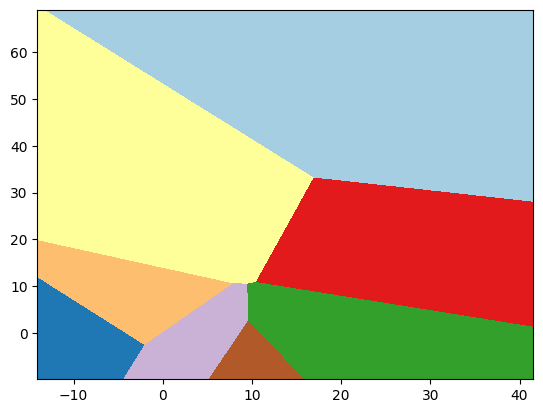

In [26]:
# Plot das áreas de clusters

plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation = 'nearest',
           extent = (xx.min(),xx.max(), yy.min(),yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto',
           origin = 'lower')


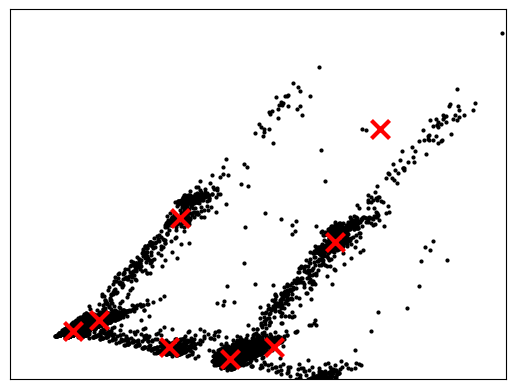

In [27]:
# Plot das áreas de centróides

plt.plot(pca[:,0], pca[:,1], 'k.', markersize = 4)
centroids = modelo_v1.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s=169, linewidths=3, color = 'r', zorder = 8)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [28]:
#?silhouette_score

In [29]:
# Silhoute score

labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')


0.6579724348106257

In [30]:
# Criando um modelo com K = 10

modelo_v2 = KMeans(n_clusters = 10)
modelo_v2.fit(pca)

KMeans(n_clusters=10)

In [31]:
# Obtém valores na forma máxima e mínimas e organiza o shape

x_min, x_max = pca[:,0].min() -5, pca[:,0].max() -1
y_min, y_max = pca[:,1].min() +1, pca[:,1].max() +5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02))
Z = modelo_v2.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

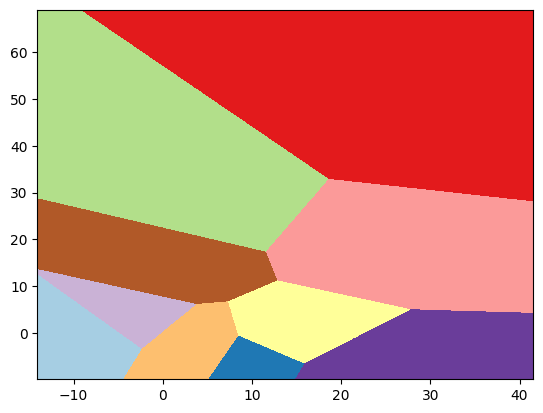

In [32]:
# Plot das áreas de clusters

plt.figure(1)
plt.clf()
plt.imshow(Z,
           interpolation = 'nearest',
           extent = (xx.min(),xx.max(), yy.min(),yy.max()),
           cmap = plt.cm.Paired,
           aspect = 'auto',
           origin = 'lower')

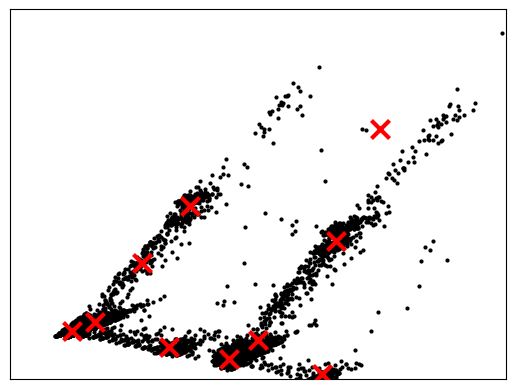

In [33]:
# Plot das áreas de centróides

plt.plot(pca[:,0], pca[:,1], 'k.', markersize = 4)
centroids = modelo_v2.cluster_centers_
inert = modelo_v1.inertia_
plt.scatter(centroids[:,0], centroids[:,1], marker = 'x', s=169, linewidths=3, color = 'r', zorder = 8)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [34]:
# Silhoute score - utilizamos para avaliar se o número de clusters é o ideal( mais próximo de 1 melhor, e -1 pior)
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')

0.6579724348106257

In [35]:
# Criar silhueta map com o modelo v1

# Lista com o nome das colunas

names = ['Global_active_power', 'Global_reative_power', 'Voltage', 'Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']

In [36]:
# Criar Cluster map

cluster_map = pd.DataFrame(amostra1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_

In [37]:
cluster_map

,Global_active_power,Global_reative_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.154,0.000,242.860,0.600,0.000,0.000,1.0,1
1,0.348,0.000,241.310,1.400,0.000,0.000,1.0,1
2,0.244,0.110,241.840,1.000,0.000,0.000,1.0,1
3,0.278,0.082,240.360,1.200,0.000,1.000,0.0,1
4,0.448,0.082,248.910,1.800,0.000,1.000,1.0,1
...,...,...,...,...,...,...,...,...
20487,0.412,0.242,241.290,2.000,0.000,2.000,1.0,1
20488,1.336,0.000,239.040,5.600,0.000,0.000,18.0,7
20489,0.394,0.210,241.830,1.800,0.000,0.000,0.0,1
20490,0.244,0.154,242.980,1.200,0.000,1.000,0.0,1


In [38]:
# calcula a média de consumo de energia por cluster

cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    5.928875
1    0.379798
2    3.054788
3    4.211756
4    1.611921
5    1.144638
6    2.922038
7    1.676727
Name: Global_active_power, dtype: float64

In [39]:
# calcula a quantidade de observações por cluster
cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0       96
1    11440
2      810
3      532
4     1542
5      448
6      365
7     5259
Name: Global_active_power, dtype: int64

Gerando Clusters com dados normalizados

In [40]:
# Obter os valores do atributos

df_atrib = df.values

In [41]:
# Importar biblioteca para realizar a normalização

from sklearn.preprocessing import MinMaxScaler

In [42]:
# Criar o objeto para normalizar e realizar a normalização

Padronizador = MinMaxScaler()
df_atrib = Padronizador.fit_transform(df_atrib)

In [43]:
amostra1, amostra2 = train_test_split(df_atrib, train_size =.01)
pca = PCA(n_components=2).fit_transform(amostra1)
k_range = range(1,12)
k_means_var = [KMeans(n_clusters= k).fit(pca)for k in k_range]
centroids = [X.cluster_centers_ for X in k_means_var]
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids]
dist = [np.min(ke,axis = 1)for ke in k_euclid]
soma_quadrados_intra_clusters = [sum(d**2)for d in dist]
soma_total = sum(pdist(pca)**2)/pca.shape[0]
#soma dos quadrados entre os cluters
soma_quadrados_inter_clusters = soma_total - soma_quadrados_intra_clusters
# criando um modelo com 8 clusters
modelo_v1 = KMeans(n_clusters = 8)
modelo_v1.fit(pca)
# Obtém valores mínimos e máximos e organiza o shape
x_min, x_max = pca[:,0].min() -5, pca[:,0].max() -1
y_mim, y_max = pca[:,1].min() +1, pca[:,1].max() +5
xx, yy = np.meshgrid(np.arange(x_min,x_max, .02), np.arange(y_min,y_max, .02))
Z = modelo_v1.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
# Silhoute score
labels = modelo_v1.labels_
silhouette_score(pca, labels, metric = 'euclidean')
# Lista com nome das colunas
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Criar cluster map
cluster_map = pd.DataFrame(amostra1, columns = names)
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power'])
cluster_map['cluster'] = modelo_v1.labels_
cluster_map



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,0.027159,0.077698,0.642649,0.029046,0.000000,0.0250,0.032258,0
1,0.030599,0.076259,0.695315,0.033195,0.000000,0.0000,0.000000,0
2,0.273945,0.105036,0.527948,0.269710,0.000000,0.3625,0.354839,1
3,0.121130,0.110791,0.467851,0.120332,0.000000,0.0000,0.580645,5
4,0.264349,0.046043,0.623263,0.248963,0.011364,0.0000,0.580645,1
...,...,...,...,...,...,...,...,...
20487,0.017925,0.083453,0.638449,0.020747,0.000000,0.0000,0.032258,0
20488,0.110628,0.050360,0.325363,0.112033,0.000000,0.0000,0.548387,1
20489,0.028608,0.164029,0.733441,0.033195,0.000000,0.0125,0.032258,0
20490,0.133623,0.060432,0.560582,0.128631,0.000000,0.0000,0.000000,3


In [44]:

# Calcula a quantidade de observações por clusters

cluster_map.groupby('cluster')['Global_active_power'].count()

cluster
0    9043
1    1796
2     399
3    3789
4     534
5    4166
6     173
7     592
Name: Global_active_power, dtype: int64